In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
def correct_marital_status(x):
    if(x == "A"):
        c = "Married"
    elif(x == "B"):
        c = "Single"
    elif(x == "U"):
        c = "Unknown"
    return c

In [3]:
def replace_unknowns(hh_comp, marital_status, hh_size):
    if(hh_comp == '2 Adults Kids' and marital_status == 'Unknown'):
        marital_status = 'Married'
    elif(hh_comp == '1 Adult Kids' and marital_status == 'Unknown'):
        marital_status = 'Single' 
    elif((hh_comp == 'Single Male' or hh_comp == 'Single Female') and marital_status == 'Unknown'):
        marital_status = 'Single' 
    elif(hh_size == '1' and marital_status == 'Unknown'):
        marital_status = 'Single' 
    else:
        marital_status = marital_status
    return marital_status

In [9]:
def correct_indecome(x):
    if(x == "Under 15K"):
        c = "-15K"
    elif(len(x) == 6):
        c = '-'.join([x.split('-')[0].zfill(3),x.split('-')[1].zfill(4)])
    else:
        c = x
    return c

In [4]:
def ploting_stacked_plot(count,elements,list_specifics,specific,text):
    #print(count)
    #print(elements)
    #print(list_specifics)
    count = np.array(count)
    c = pd.DataFrame(np.transpose(count),columns = tuple(list_specifics),index =tuple(set(elements)))
    sns.set()
    if len(elements) <= 12:
        sns.set_palette("Paired", 12)
    else:
        sns.set_palette("hls", 20)
    c.T.plot(kind = 'bar',stacked = True,figsize = (15,10))
    plt.ylabel('Purchases Counts per Food')
    plt.xlabel(specific)
    plt.title(['Amount of purchases of '+text+' foods along '+specific])
    plt.show()

In [6]:
demographic = pd.read_csv('dataset/hh_demographic.csv', delimiter=',')
print(f'The number of rows and columns in the dataframe is respectively {demographic.shape[0]} and {demographic.shape[1]}')
demographic.head()

The number of rows and columns in the dataframe is respectively 801 and 8


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [10]:
demographic.INCOME_DESC = demographic.INCOME_DESC.apply(correct_indecome)
demographic.MARITAL_STATUS_CODE = demographic.MARITAL_STATUS_CODE.apply(correct_marital_status)

In [11]:
demographic.MARITAL_STATUS_CODE = demographic.apply(lambda row: replace_unknowns(row['HH_COMP_DESC'],
                                                    row['MARITAL_STATUS_CODE'], row['HOUSEHOLD_SIZE_DESC']),axis=1)

In [13]:
transaction = pd.read_csv('dataset/transaction_data.csv', delimiter=',')
print(f'The number of rows and columns in the dataframe is respectively {transaction.shape[0]} and {transaction.shape[1]}')
transaction.head()

The number of rows and columns in the dataframe is respectively 2595732 and 12


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [14]:
behavior_consumer = pd.DataFrame(transaction.groupby(['household_key']).sum().SALES_VALUE)
behavior_consumer['SALES_VALUE_TOTAL'] = behavior_consumer['SALES_VALUE']
behavior_consumer = behavior_consumer.drop(columns=['SALES_VALUE'])
transaction = pd.merge(transaction, behavior_consumer, on='household_key')
transaction.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,SALES_VALUE_TOTAL
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2841.4
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2841.4
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2841.4
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2841.4
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2841.4


In [17]:
product = pd.read_csv('dataset/product.csv', delimiter=',')
print(f'There are {product.shape[0]} rows and {product.shape[1]} columns')
product.head()

There are 92353 rows and 7 columns


,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [18]:
list_food = ['GROCERY','PASTERY','PRODUCE','NUTRITION','MEAT','FROZEN GROCERY','SALAD BAR','SEAFOOD','SPIRITS','SEAFOOD-PCKGD','MEAT-PCKG','DELI'] 
food_related_products = product[product.DEPARTMENT.apply(lambda x: x in list_food)]
print(f'There are now {food_related_products.shape[0]} rows and {food_related_products.shape[1]} columns')

There are now 51331 rows and 7 columns


In [19]:
food_related_products.drop(columns = ['BRAND','CURR_SIZE_OF_PRODUCT','MANUFACTURER'],inplace = True)
consumution = transaction.drop(columns = ['STORE_ID','RETAIL_DISC','TRANS_TIME','COUPON_DISC','COUPON_MATCH_DISC'])
inter = pd.merge(food_related_products,consumution,on =  'PRODUCT_ID')
full_data_set = pd.merge(inter,demographic,on = 'household_key')
full_data_set.head()

C:\Users\ismai\Anaconda3\envs\data\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PRODUCT_ID,DEPARTMENT,COMMODITY_DESC,SUB_COMMODITY_DESC,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,WEEK_NO,SALES_VALUE_TOTAL,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,25671,GROCERY,FRZN ICE,ICE - CRUSHED/CUBED,1228,29046618323,157,1,3.49,23,14503.89,45-54,Single,100-124K,Unknown,Single Female,1,None/Unknown
1,43266,GROCERY,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1228,29513525602,187,1,0.89,27,14503.89,45-54,Single,100-124K,Unknown,Single Female,1,None/Unknown
2,68543,GROCERY,DOG FOODS,CAN DOGFD GOURMET/SUPER PREM (,1228,31841925002,325,1,0.69,47,14503.89,45-54,Single,100-124K,Unknown,Single Female,1,None/Unknown
3,71759,GROCERY,FROZEN PIE/DESSERTS,FRZN WHIPPED TOPPING,1228,30589276083,235,1,0.69,34,14503.89,45-54,Single,100-124K,Unknown,Single Female,1,None/Unknown
4,73580,GROCERY,ICE CREAM/MILK/SHERBTS,QUARTS,1228,28394445201,117,1,4.99,17,14503.89,45-54,Single,100-124K,Unknown,Single Female,1,None/Unknown


Bestsellers
Let’s have a look which products are sold most often (top10). And the clear winner is: FLUID MILK 

In [22]:
full_data_set.SUB_COMMODITY_DESC.value_counts()[:10]

FLUID MILK WHITE ONLY             35424
YOGURT NOT MULTI-PACKS            22360
SOFT DRINKS 12/18&15PK CAN CAR    20927
SFT DRNK 2 LITER BTL CARB INCL    18126
BANANAS                           17933
SHREDDED CHEESE                   14680
MAINSTREAM WHITE BREAD            13722
POTATO CHIPS                      11523
CONDENSED SOUP                    10127
FRZN SS PREMIUM ENTREES/DNRS/N     9779
Name: SUB_COMMODITY_DESC, dtype: int64

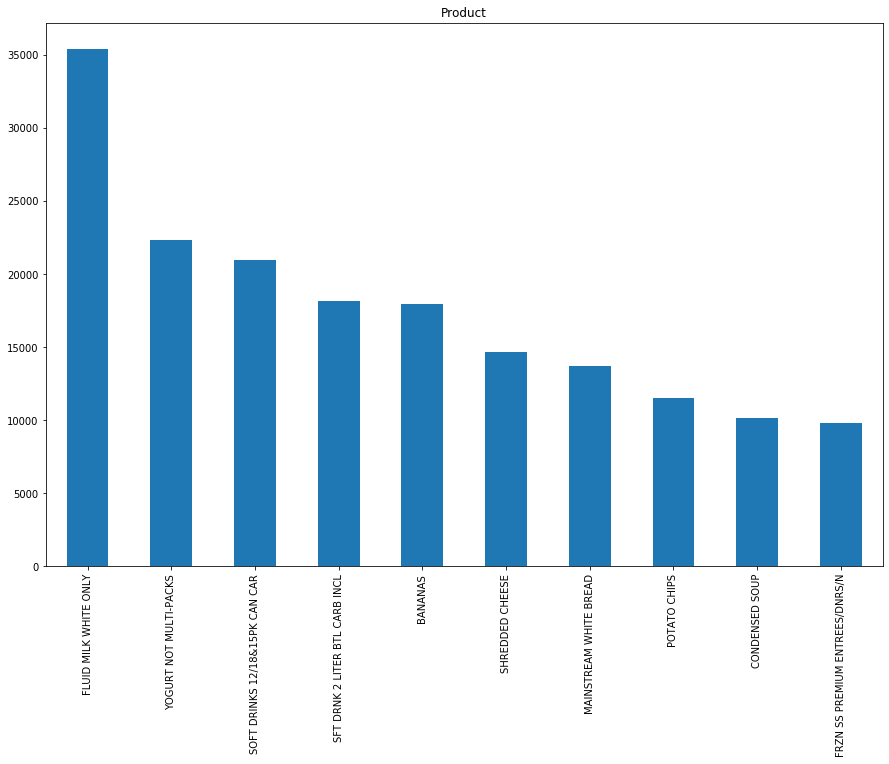

In [23]:
plt.figure(num = None, figsize = (15,10))
plt.subplot(1,1,1)
ax = full_data_set.SUB_COMMODITY_DESC.value_counts()[:10].plot.bar()
ax.title.set_text('Product')
plt.show()

How often do people order the same items again?

In [85]:
test = full_data_set.groupby(['household_key','SUB_COMMODITY_DESC']).count()[['DAY']]

In [86]:
reordered = pd.DataFrame(test.DAY.apply(lambda x: True if x>1 else False))

In [87]:
reordered.DAY.value_counts()

True     134239
False     75892
Name: DAY, dtype: int64

63% of product are reorered and 35% of product are not

In [88]:
reordered.DAY.value_counts()/reordered.DAY.count()

True     0.638835
False    0.361165
Name: DAY, dtype: float64

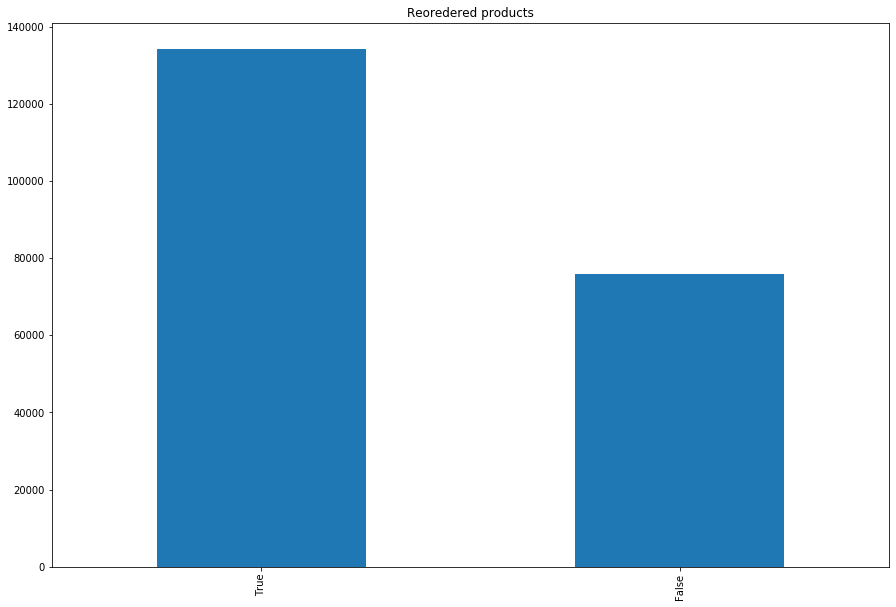

In [89]:
plt.figure(num = None, figsize = (15,10))
plt.subplot(1,1,1)
ax = reordered.DAY.value_counts().plot.bar()
ax.title.set_text('Reoredered products')
plt.show()

Most often reordered
Now here it becomes really interesting. These 10 products have the highest probability of being reordered.

In [113]:
reordered = reordered.reset_index().rename(columns={'household_key':'household_key','SUB_COMMODITY_DESC' : 'SUB_COMMODITY_DESC'})

In [114]:
reordered[reordered.DAY != False]

,index,DAY,household_key,SUB_COMMODITY_DESC
0,0,True,1,ADULT CEREAL
3,3,True,1,AIR CARE - CANDLES
4,4,True,1,AIR CARE - CONTINUOUS - NON EL
5,5,True,1,AIR CARE - CONTINUOUS ACTION
6,6,True,1,ALL FAMILY CEREAL
...,...,...,...,...
210123,210123,True,2499,VARIETY BEANS - KIDNEY PINTO
210124,210124,True,2499,VEGETABLE/SALAD OIL
210126,210126,True,2499,VIENNA SAUSAGE
210127,210127,True,2499,WAFFLES/PANCAKES/FRENCH TOAST


In [120]:
reordered = reordered.drop(columns = 'index')

In [123]:
reordered.SUB_COMMODITY_DESC.value_counts()[:10]

FLUID MILK WHITE ONLY             791
BANANAS                           768
POTATO CHIPS                      745
SHREDDED CHEESE                   744
SOFT DRINKS 12/18&15PK CAN CAR    737
EGGS - LARGE                      733
POURABLE SALAD DRESSINGS          728
SEMI-SOLID SALAD DRESSING MAY     717
SPICES & SEASONINGS               714
CONDENSED SOUP                    709
Name: SUB_COMMODITY_DESC, dtype: int64

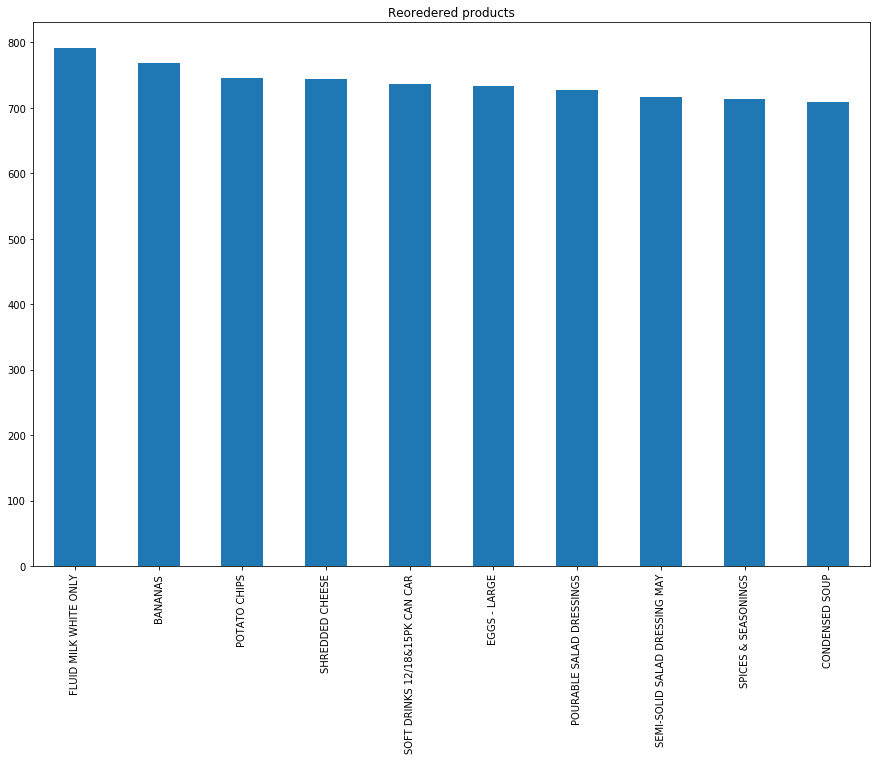

In [124]:
plt.figure(num = None, figsize = (15,10))
plt.subplot(1,1,1)
ax = reordered.SUB_COMMODITY_DESC.value_counts()[:10].plot.bar()
ax.title.set_text('Reoredered products')
plt.show()

House hold having the strongest habits bying always the same stuff

In [129]:
reordered.household_key.value_counts()[:10]

1453    632
2322    577
1901    526
934     512
2264    509
718     499
2284    498
1653    493
1995    492
400     488
Name: household_key, dtype: int64

In [155]:
test = full_data_set.groupby(['household_key','SUB_COMMODITY_DESC']).count().sort_values("DAY").groupby(level=0).tail(1)[['DAY']]

In [177]:
zab = pd.DataFrame(test.DAY).reset_index().rename(columns={'household_key':'household_key','SUB_COMMODITY_DESC' : 'SUB_COMMODITY_DESC'})

In [178]:
zab

,household_key,SUB_COMMODITY_DESC,DAY
0,2397,MAINSTREAM WHITE BREAD,11
1,2254,FLUID MILK WHITE ONLY,12
2,992,BEERALEMALT LIQUORS,13
3,1219,SFT DRNK 3 LITER BTL CARB (EXC,13
4,1492,FRZN BAGGED VEGETABLES - PLAIN,14
...,...,...,...
796,1631,SFT DRNK 2 LITER BTL CARB INCL,407
797,543,CANNED CAT FOOD (9 LIVES/FRISK,452
798,1378,YOGURT NOT MULTI-PACKS,484
799,27,BEERALEMALT LIQUORS,525


In [179]:
zab.SUB_COMMODITY_DESC.value_counts()

FLUID MILK WHITE ONLY             167
YOGURT NOT MULTI-PACKS             97
SOFT DRINKS 12/18&15PK CAN CAR     72
SFT DRNK 2 LITER BTL CARB INCL     70
FRZN SS PREMIUM ENTREES/DNRS/N     30
                                 ... 
BLENDS                              1
CARBONATED WATER - FLVRD SWEET      1
FLUID MILK                          1
FRUIT/BREAKFAST BREAD               1
FRUIT DRINKS: CANNED & GLASS (      1
Name: SUB_COMMODITY_DESC, Length: 111, dtype: int64

In [180]:
zab2 = pd.merge(zab,demographic,on = 'household_key')

In [181]:
zab2

,household_key,SUB_COMMODITY_DESC,DAY,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,2397,MAINSTREAM WHITE BREAD,11,65+,Single,125-149K,Unknown,2 Adults No Kids,2,None/Unknown
1,2254,FLUID MILK WHITE ONLY,12,19-24,Single,035-049K,Unknown,Single Male,1,None/Unknown
2,992,BEERALEMALT LIQUORS,13,45-54,Married,035-049K,Homeowner,2 Adults Kids,3,1
3,1219,SFT DRNK 3 LITER BTL CARB (EXC,13,19-24,Married,015-024K,Homeowner,2 Adults Kids,3,1
4,1492,FRZN BAGGED VEGETABLES - PLAIN,14,65+,Married,015-024K,Homeowner,2 Adults No Kids,2,None/Unknown
...,...,...,...,...,...,...,...,...,...,...
796,1631,SFT DRNK 2 LITER BTL CARB INCL,407,19-24,Single,-15K,Renter,1 Adult Kids,4,3+
797,543,CANNED CAT FOOD (9 LIVES/FRISK,452,35-44,Married,035-049K,Probable Owner,1 Adult Kids,3,1
798,1378,YOGURT NOT MULTI-PACKS,484,25-34,Single,100-124K,Unknown,Single Female,1,None/Unknown
799,27,BEERALEMALT LIQUORS,525,45-54,Single,025-034K,Probable Renter,Single Female,1,None/Unknown


In [187]:
zab2.groupby(['SUB_COMMODITY_DESC','AGE_DESC']).count()[:20]

household_key  DAY  \
SUB_COMMODITY_DESC             AGE_DESC                       
ADULT CEREAL                   45-54                 2    2   
                               65+                   1    1   
ASEPTIC MILK                   45-54                 1    1   
ASEPTIC PACK JUICE AND DRINKS  35-44                 1    1   
                               45-54                 3    3   
BABY FOOD                      35-44                 1    1   
BANANAS                        25-34                 4    4   
                               35-44                 2    2   
                               45-54                11   11   
                               55-64                 3    3   
                               65+                   5    5   
BEANS GREEN: FS/WHL/CUT        35-44                 1    1   
BEERALEMALT LIQUORS            19-24                 2    2   
                               25-34                 8    8   
                               35-44                 4    4   
                               45-54                 4    4   
                               65+                   2    2   
BLENDS                         25-34                 1    1   
BOX WINES                      55-64                 1    1   
BUTTER SPRAY CRACKER (RITZ/CLU 35-44                 1    1   

                                         MARITAL_STATUS_CODE  INCOME_DESC  \
SUB_COMMODITY_DESC             AGE_DESC                                     
ADULT CEREAL                   45-54                       2            2   
                               65+                         1            1   
ASEPTIC MILK                   45-54                       1            1   
ASEPTIC PACK JUICE AND DRINKS  35-44                       1            1   
                               45-54                       3            3   
BABY FOOD                      35-44                       1            1   
BANANAS                        25-34                       4            4   
                               35-44                       2            2   
                               45-54                      11           11   
                               55-64                       3            3   
                               65+                         5            5   
BEANS GREEN: FS/WHL/CUT        35-44                       1            1   
BEERALEMALT LIQUORS            19-24                       2            2   
                               25-34                       8            8   
                               35-44                       4            4   
                               45-54                       4            4   
                               65+                         2            2   
BLENDS                         25-34                       1            1   
BOX WINES                      55-64                       1            1   
BUTTER SPRAY CRACKER (RITZ/CLU 35-44                       1            1   

                                         HOMEOWNER_DESC  HH_COMP_DESC  \
SUB_COMMODITY_DESC             AGE_DESC                                 
ADULT CEREAL                   45-54                  2             2   
                               65+                    1             1   
ASEPTIC MILK                   45-54                  1             1   
ASEPTIC PACK JUICE AND DRINKS  35-44                  1             1   
                               45-54                  3             3   
BABY FOOD                      35-44                  1             1   
BANANAS                        25-34                  4             4   
                               35-44                  2             2   
                               45-54                 11            11   
                               55-64                  3             3   
                               65+                    5             5   
BEANS GREE

In [188]:
zab2.groupby(['SUB_COMMODITY_DESC','INCOME_DESC']).count()[:20]

household_key  DAY  AGE_DESC  \
SUB_COMMODITY_DESC            INCOME_DESC                                 
ADULT CEREAL                  025-034K                 1    1         1   
                              075-099K                 2    2         2   
ASEPTIC MILK                  050-074K                 1    1         1   
ASEPTIC PACK JUICE AND DRINKS 035-049K                 1    1         1   
                              075-099K                 1    1         1   
                              125-149K                 1    1         1   
                              175-199K                 1    1         1   
BABY FOOD                     075-099K                 1    1         1   
BANANAS                       -15K                     3    3         3   
                              015-024K                 2    2         2   
                              025-034K                 2    2         2   
                              035-049K                 3    3         3   
                              050-074K                 6    6         6   
                              075-099K                 2    2         2   
                              100-124K                 3    3         3   
                              150-174K                 2    2         2   
                              175-199K                 1    1         1   
                              200-249K                 1    1         1   
BEANS GREEN: FS/WHL/CUT       075-099K                 1    1         1   
BEERALEMALT LIQUORS           015-024K                 3    3         3   

                                           MARITAL_STATUS_CODE  \
SUB_COMMODITY_DESC            INCOME_DESC                        
ADULT CEREAL                  025-034K                       1   
                              075-099K                       2   
ASEPTIC MILK                  050-074K                       1   
ASEPTIC PACK JUICE AND DRINKS 035-049K                       1   
                              075-099K                       1   
                              125-149K                       1   
                              175-199K                       1   
BABY FOOD                     075-099K                       1   
BANANAS                       -15K                           3   
                              015-024K                       2   
                              025-034K                       2   
                              035-049K                       3   
                              050-074K                       6   
                              075-099K                       2   
                              100-124K                       3   
                              150-174K                       2   
                              175-199K                       1   
                              200-249K                       1   
BEANS GREEN: FS/WHL/CUT       075-099K                       1   
BEERALEMALT LIQUORS           015-024K                       3   

                                           HOMEOWNER_DESC  HH_COMP_DESC  \
SUB_COMMODITY_DESC            INCOME_DESC                                 
ADULT CEREAL                  025-034K                  1             1   
                              075-099K                  2             2   
ASEPTIC MILK                  050-074K                  1             1   
ASEPTIC PACK JUICE AND DRINKS 035-049K                  1             1   
                              075-099K                  1             1   
                              125-149K                  1             1   
                              175-199K                  1             1   
BABY FOOD                     075-099K                  1             1   
BANANAS                       -15K                      3             3   
                              015-024K                  2             2   
                              025-034K 

In [191]:
zab2.groupby(['MARITAL_STATUS_CODE','SUB_COMMODITY_DESC']).count()[:20]

household_key  DAY  \
MARITAL_STATUS_CODE SUB_COMMODITY_DESC                                   
Married             ADULT CEREAL                                3    3   
                    ASEPTIC PACK JUICE AND DRINKS               3    3   
                    BANANAS                                    15   15   
                    BEANS GREEN: FS/WHL/CUT                     1    1   
                    BEERALEMALT LIQUORS                         6    6   
                    BOX WINES                                   1    1   
                    CAN CATFD GOURMET/SUP PREM (GR              4    4   
                    CAN DOG FOOD (SKIPPY/PEDIGREE/              3    3   
                    CAN DOGFD GOURMET/SUPER PREM (              1    1   
                    CANNED CAT FOOD (9 LIVES/FRISK             10   10   
                    CEREAL - COLD                               1    1   
                    CEREAL BARS                                 2    2   
                    CHEESE: PROCESSED BULK                      1    1   
                    CHEESE:SPECIALTY PREPACK                    1    1   
                    CHOCOLATE MILK                              1    1   
                    CONDENSED SOUP                              1    1   
                    COTTAGE CHEESE                              1    1   
                    DAIRY CASE 100% PURE JUICE - O              1    1   
                    DAIRY CASE FRUIT DRINKS (NO JU              1    1   
                    DISTILLED WATER                             2    2   

                                                    AGE_DESC  INCOME_DESC  \
MARITAL_STATUS_CODE SUB_COMMODITY_DESC                                      
Married             ADULT CEREAL                           3            3   
                    ASEPTIC PACK JUICE AND DRINKS          3            3   
                    BANANAS                               15           15   
                    BEANS GREEN: FS/WHL/CUT                1            1   
                    BEERALEMALT LIQUORS                    6            6   
                    BOX WINES                              1            1   
                    CAN CATFD GOURMET/SUP PREM (GR         4            4   
                    CAN DOG FOOD (SKIPPY/PEDIGREE/         3            3   
                    CAN DOGFD GOURMET/SUPER PREM (         1            1   
                    CANNED CAT FOOD (9 LIVES/FRISK        10           10   
                    CEREAL - COLD                          1            1   
                    CEREAL BARS                            2            2   
                    CHEESE: PROCESSED BULK                 1            1   
                    CHEESE:SPECIALTY PREPACK               1            1   
                    CHOCOLATE MILK                         1            1   
                    CONDENSED SOUP                         1            1   
                    COTTAGE CHEESE                         1            1   
                    DAIRY CASE 100% PURE JUICE - O         1            1   
                    DAIRY CASE FRUIT DRINKS (NO JU         1            1   
                    DISTILLED WATER                        2            2   

                                                    HOMEOWNER_DESC  \
MARITAL_STATUS_CODE SUB_COMMODITY_DESC                               
Married             ADULT CEREAL                                 3   
                    ASEPTIC PACK JUICE AND DRINKS                3   
                    BANANAS                                     15   
                    BEANS GREEN: FS/WHL/CUT                      1   
                    BEERALEMALT LIQUORS                          6   
                    BOX WINES                                    1   
                    CAN CATFD GOURMET/SUP PREM (GR               4   
                    CAN DOG FOOD (SKIPPY/PEDIGREE/               3   
                    CAN DOGF